# TAREA #1: ENTENDER EL ENUNCIADO DEL PROBLEMA Y EL CASO PRÁCTICO


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=1SMIJE9sC8Q1xXAC00C6OPV2x9RR_-uVL"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figura 1. Segmentación de Clientes
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=1NLjW1mBTHKlHuvcdN3KNj3oplyQZ27sl)

![alt text](https://drive.google.com/uc?id=1Oc_ZUhdeB-pIvqJW3RKLLDvgi0Nc-vfx)

![alt text](https://drive.google.com/uc?id=1OSYdM1zLUsZiGPB6NqBnvOnMenVWed6i)

![alt text](https://drive.google.com/uc?id=1OFbBDkYX2iV72pWCSSIA-1q_TlZVYpjm)

![alt text](https://drive.google.com/uc?id=1OCQv343ii0htE_ljvTI-X3irUduQwzFT)

![alt text](https://drive.google.com/uc?id=1OAIpR22522oMW7IO0Nu0ExIMx95yOsXU)

Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

# TAREA #2: IMPORTAR LAS LIBRERÍAS Y LOS DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# Necesitarás montar tu disco usando los siguientes comandos:
# Para obtener más información sobre el montaje, consulta esto: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Incluye el link al archivo CSV donde has almacenado tu dataset
creditcard_df = pd.read_csv("/content/drive/MyDrive/ds4b/2. Marketing Department/Marketing_data.csv")
# CUSTID: Identificación del titular de la tarjeta de crédito
# BALANCE: Cantidad de saldo que queda en la cuenta del cliente para hacer compras
# BALANCE_FREQUENCY: Frecuencia de la actualización del saldo, puntuación entre 0 y 1 (1 = actualizado con frecuencia, 0 = no actualizado con frecuencia)
# PURCHASES: Cantidad de compras realizadas desde la cuenta
# ONEOFFPURCHASES: Importe máximo de compra realizado en una sola vez
# INSTALLMENTS_PURCHASES: Importe de la compra realizada en cuotas
# CASH_ADVANCE: Anticipo otorgado al usuario
# PURCHASES_FREQUENCY: frecuencia con la que se realizan las compras, puntuación entre 0 y 1 (1 = compras frecuentes, 0 = compras no frecuentes)
# PURCHASES_FREQUENCY: Frecuencia de las Compras se están realizando, puntuación entre 0 y 1 (1 = compra con frecuencia, 0 = no compra con frecuencia)
# ONEOFF_PURCHASES_FREQUENCY: Con qué frecuencia las compras se realizan de una sola vez (1 = compra con frecuencia, 0 = no compra con frecuencia)
# PURCHASES_INSTALLMENTS_FREQUENCY: Con qué frecuencia se realizan las compras a plazos (1 = se realizan con frecuencia, 0 = no se realizan con frecuencia)
# CASH_ADVANCE_FREQUENCY: con qué frecuencia el gasto se paga por adelantado
# CASH_ADVANCE_TRX: número de transacciones realizadas con "Efectivo por adelantado"
# PURCHASES_TRX: número de transacciones de compras realizadas
# CREDIT_LIMIT: límite de tarjeta de crédito para el usuario
# PAYMENTS: Número de pagos realizados por el usuario
# MINIMUM_PAYMENTS: cantidad mínima de pagos realizados por el usuario
# PRC_FULL_PAYMENT: porcentaje del pago total pagado por el usuario
# TENURE: Años que el usuario lleva usando el servicio de tarjeta de crédito

In [4]:
creditcard_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [5]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
creditcard_df.describe()
# El balance medio es $1564 
# La frecuencia del balance se actualiza bastante a menudo, en promedio ~0.9
# El promedio de las compras es $1000
# El importe máximo de compra no recurrente es en promedio ~$600
# El promedio de la frecuencia de las compras está cerca de 0.5
# El promedio de ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, y CASH_ADVANCE_FREQUENCY es en general bajo
# El promedio del límite de crédito es ~ 4500
# El porcentaje de pago completo es 15%
# Los clientes llevan de promedio en el servicio 11 años

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
# Vamos a investigar quien ha hecho una compra de $40761.25!
creditcard_df[creditcard_df["ONEOFF_PURCHASES"] == 40761.25] 

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [8]:
creditcard_df["CASH_ADVANCE"].max()

47137.21176

In [9]:
# Vamos a ver quien pago por anticipado $47137!
# Este cliente hizo un total de 123 transacciones por adelantado!!
# Nunca paga sus compras completamente con la tarjeta

creditcard_df[creditcard_df["CASH_ADVANCE"] == 47137.21176]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


# TAREA #3: VISUALIZACIÓN DEL DATASET

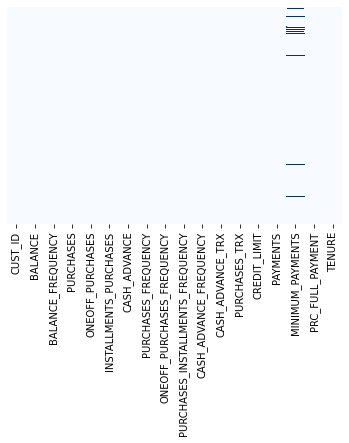

In [10]:
# Comprobemos a ver si tenemos datos faltantes, esperemos que no!
sns.heatmap(creditcard_df.isnull(), yticklabels=False, cbar=False, cmap="Blues")

In [11]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [12]:
# Vamos a rellenar los datos faltantes con el promedio del campo 'MINIMUM_PAYMENT' 
creditcard_df.loc[(creditcard_df["MINIMUM_PAYMENTS"].isnull() == True), "MINIMUM_PAYMENTS"] = creditcard_df["MINIMUM_PAYMENTS"].mean()

In [13]:
# Vamos a rellenar los datos faltantes con el promedio del campo 'CREDIT_LIMIT' 
creditcard_df.loc[(creditcard_df["CREDIT_LIMIT"].isnull() == True), "CREDIT_LIMIT"] = creditcard_df["CREDIT_LIMIT"].mean()

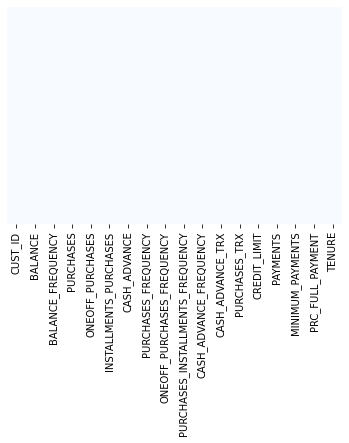

In [14]:
sns.heatmap(creditcard_df.isnull(), yticklabels=False, cbar=False, cmap="Blues")

In [15]:
# Verifiquemos si tenemos entradas duplicadas en nuestros datos 
creditcard_df.duplicated().sum()

0

In [16]:
# Podemos deshacernos del campo Customer ID ya que no nos sirve para nada 
creditcard_df.drop("CUST_ID", axis=1, inplace=True)

In [17]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [18]:
n = len(creditcard_df.columns)
n

17

In [19]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

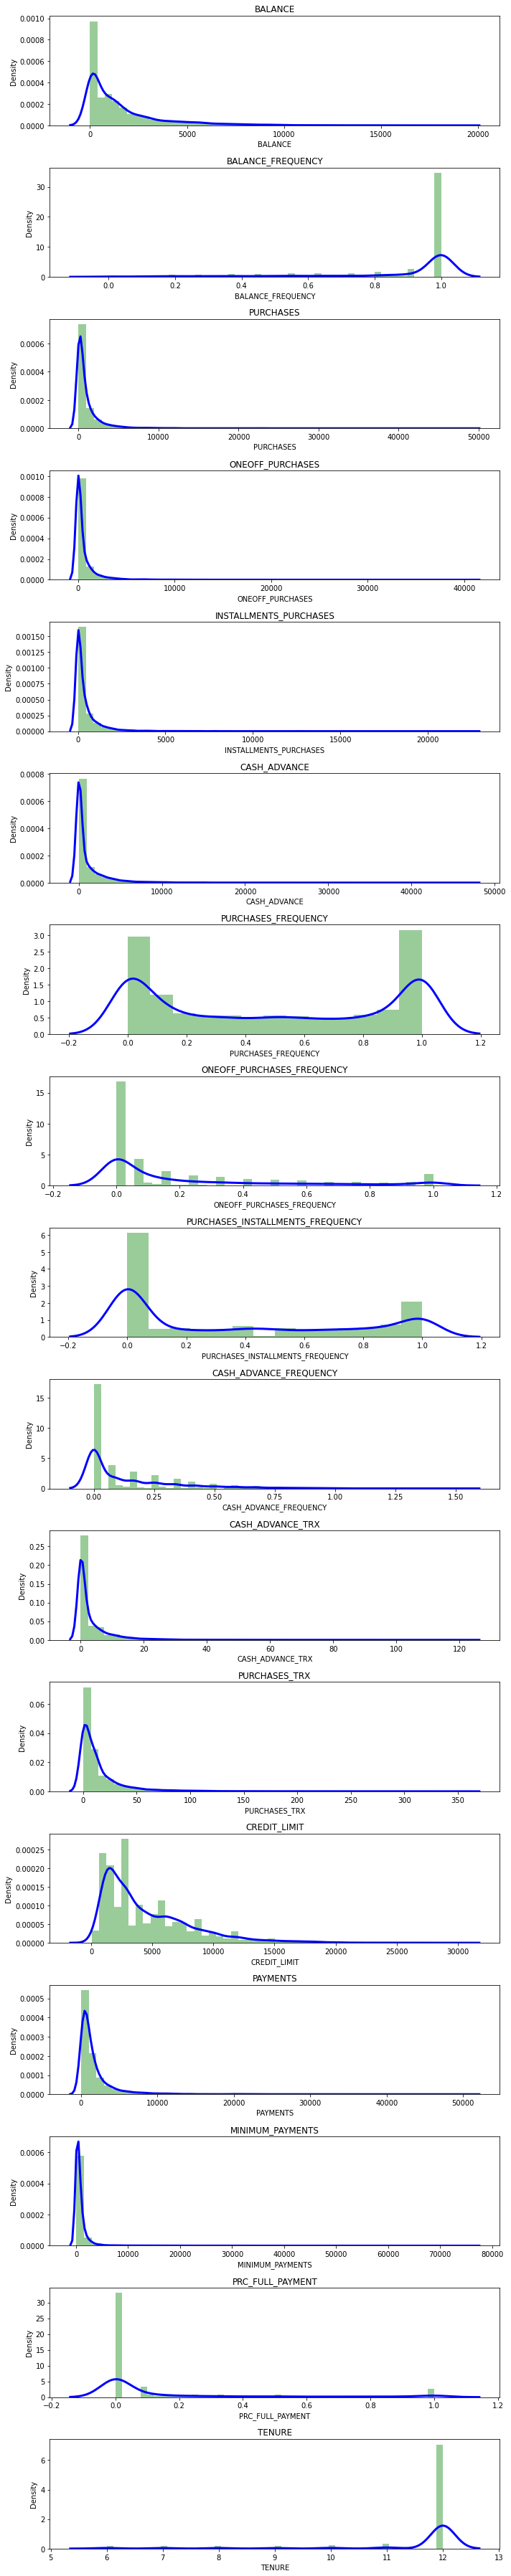

In [20]:
# distplot combina la función matplotlib.hist con la de seaborn kdeplot()
# KDE Plot representa la Kernel Density Estimate
# KDE se utiliza para visualizar la densidad de una probabilidad de una variable continua. 
# KDE nos muestra la densidad de una probabilidad para diferentes valores de una variable continua. 

# El balance promedio es $1500
# 'Balance_Frequency' para muchos usuarios se actualiza muy frecuentemente ~1
# Para el campo 'PURCHASES_FREQUENCY', hay dos grupos diferentes de clientes
# Para los campos 'ONEOFF_PURCHASES_FREQUENCY' y 'PURCHASES_INSTALLMENT_FREQUENCY' la gran mayoría de usuarios no pagan todo de golpe ni a plazos
# Muy pocos clientes pagan su deuda al completo 'PRC_FULL_PAYMENT'~0
# El promedio del límite del crédito está entorno de los $4500
# La mayoría de clientes llevan ~11 años usando el servicio

plt.figure(figsize=(10, 50))
for i in range(n):
    plt.subplot(n, 1, i+1)
    sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color":"b", "lw":3, "label":"KDE"}, hist_kws={"color":"g"})
    plt.title(creditcard_df.columns[i])

plt.tight_layout()

In [21]:
# sns.pairplot(creditcard_df)
# Hay correlación entre 'PURCHASES' y ONEOFF_PURCHASES & INSTALLMENT_PURCHASES 
# Se ve una tendencia entre 'PURCHASES' y 'CREDIT_LIMIT' & 'PAYMENTS'

In [22]:
correlations = creditcard_df.corr()

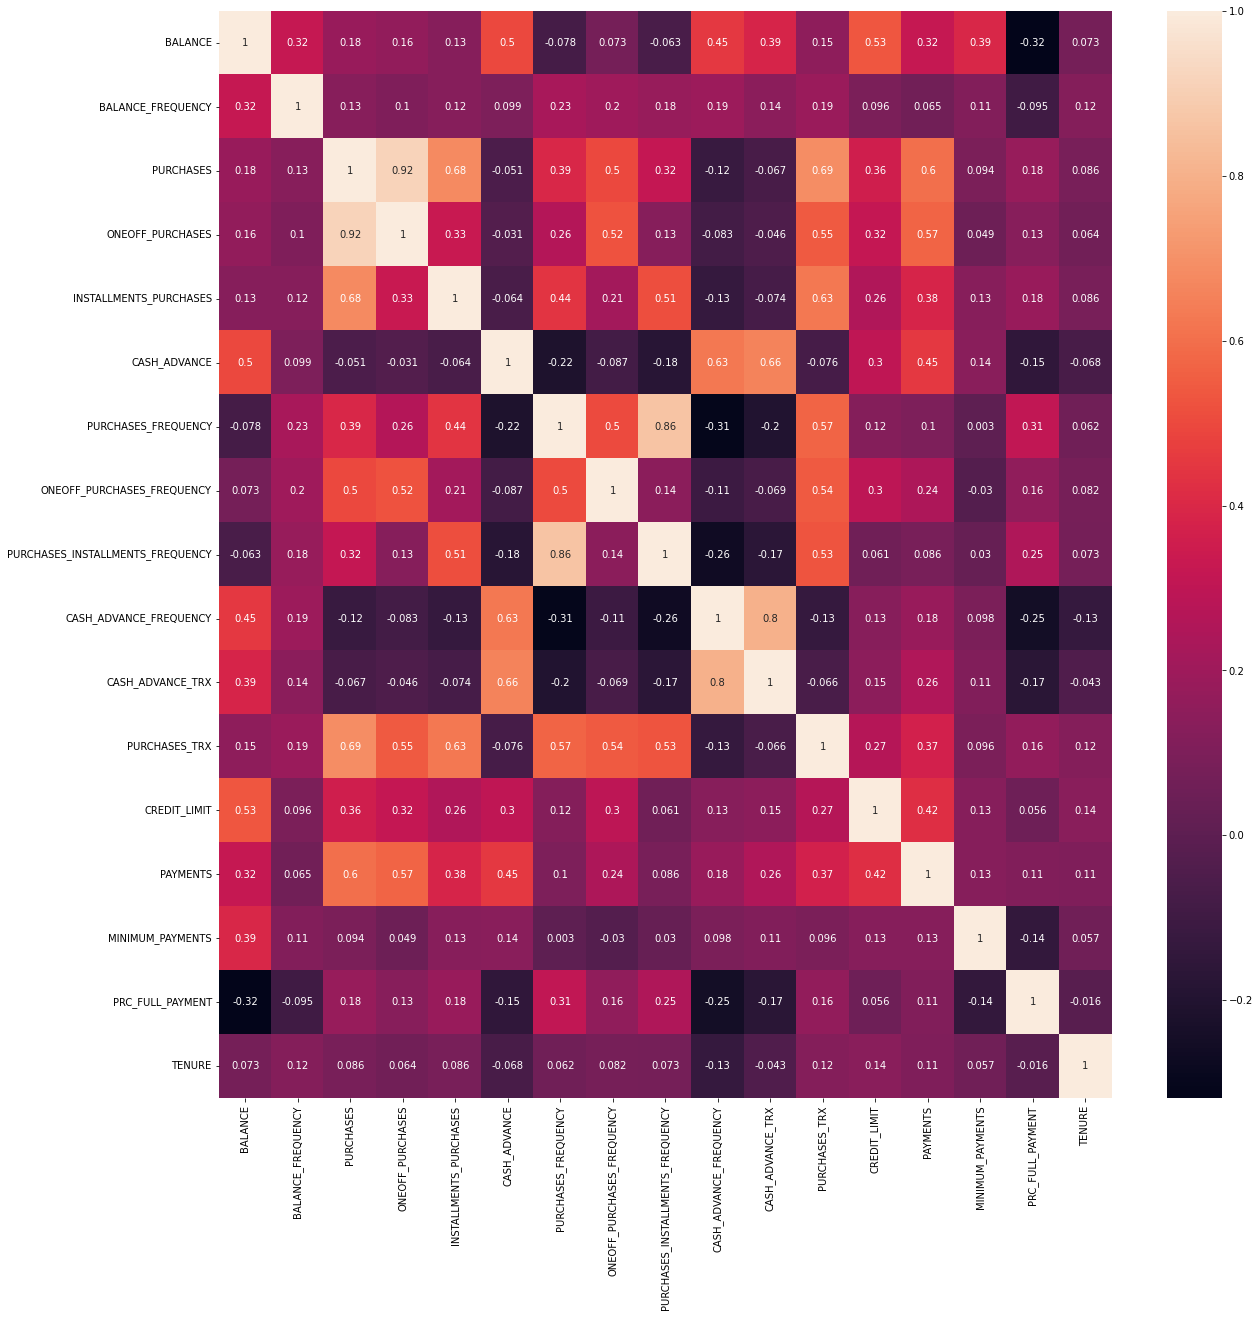

In [23]:
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(correlations, annot=True)
# 'PURCHASES' tienen una alta correlación con one-off purchases, 'installment purchases, purchase transactions, credit limit y payments. 
# Correlación positiva muy elevada entre 'PURCHASES_FREQUENCY' y 'PURCHASES_INSTALLMENT_FREQUENCY'


# TAREA #4: ENTENDER LA TEORÍA DETRÁS DE K-MEANS

![alt text](https://drive.google.com/uc?id=1O7zXPQ6riDzKZA_61kKEjdNFcbRBq20N)

![alt text](https://drive.google.com/uc?id=1O4Y7qrWSm7rssFTPSU77VIviT3F119hY)

![alt text](https://drive.google.com/uc?id=1NvXiPZpvg_ixNXITMyUMoOpzPnKwmZgt)

![alt text](https://drive.google.com/uc?id=1Nv1ybvPifTFdw6qEVGpQ1Z1pewIS2Fb8)

![alt text](https://drive.google.com/uc?id=1NqjZ-uP1DG0ICIkm0ZkQQNig072vKv9y)

![alt text](https://drive.google.com/uc?id=1NqNXpgbijGcvZ22PfCclM3pPHCNr4iFL)

![alt text](https://drive.google.com/uc?id=1NjU_qziFr8kf7UFtyxNeWlyBk1f2Yo0G)

![alt text](https://drive.google.com/uc?id=1NeJRYxwqfc3KQ_Kjrxy3ubaD2WYxwRUH)

# TAREA #5: ENCONTRAR EL NÚMERO ÓPTIMO DE CLISTERS UTILIZANDO EL MÉTODO DEL CODO

In [24]:
# Empecemos por escalar primero el dataset
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [25]:
creditcard_df_scaled.shape

(8950, 17)

In [26]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

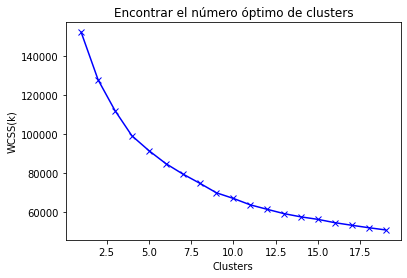

In [27]:
scores_1 = []
range_values = range(1, 20)

for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(creditcard_df_scaled)
    scores_1.append(kmeans.inertia_)  # WCSS

plt.plot(range_values, scores_1, "bx-")
plt.title("Encontrar el número óptimo de clusters")
plt.xlabel("Clusters")
plt.ylabel("WCSS(k)")
plt.show()

# Con el gráfico podemos ver que en 4 clusters es donde se forma el codo de la curva.
# Sin embargo, los valores no se reducen a una forma lineal hasta el 8º cluster. 
# Elijamos pues un número de clusters igual a 8.

# TAREA #6: APLICAR EL MÉTODO DE K-MEANS

In [28]:
kmeans = KMeans(8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [29]:
kmeans.cluster_centers_.shape

(8, 17)

In [30]:
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=[creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.670552,0.390820,-0.221894,-0.158221,-0.234052,1.996404,-0.483246,-0.214536,-0.422931,1.909673,1.915356,-0.272044,1.013781,0.812028,0.546976,-0.391516,0.071780
1,-0.700920,-2.137968,-0.309826,-0.234398,-0.301835,-0.322516,-0.553044,-0.440776,-0.438526,-0.521496,-0.376524,-0.418173,-0.174436,-0.201957,-0.256749,0.284044,0.200511
2,-0.334235,-0.345364,-0.287007,-0.212744,-0.287412,0.068171,-0.202320,-0.283605,-0.226363,0.308382,0.000348,-0.387485,-0.562891,-0.391355,-0.209255,0.013610,-3.198580
3,1.086172,0.472614,2.606207,1.903728,2.664995,-0.126617,1.163761,1.584646,1.260021,-0.269145,-0.128824,3.218719,1.337649,1.532138,0.601452,0.259664,0.335772
4,-0.358067,0.332433,-0.029523,-0.240735,0.372267,-0.362520,0.997180,-0.381259,1.208814,-0.471903,-0.359553,0.195129,-0.256957,-0.213062,-0.029777,0.314763,0.256155
5,0.007261,0.404219,-0.354547,-0.239279,-0.398613,-0.099693,-0.842331,-0.384932,-0.750951,0.093338,-0.035561,-0.478214,-0.306243,-0.252035,-0.013326,-0.454892,0.273961
6,-0.118892,0.403177,0.563360,0.683578,0.076002,-0.331953,0.997145,1.913869,0.212455,-0.415090,-0.331883,0.658778,0.458613,0.162037,-0.154479,0.453930,0.272847
7,1.865907,0.332878,12.596844,13.111182,5.696389,-0.004178,1.033322,2.170634,0.866221,-0.476183,-0.214854,4.566558,3.174197,8.991136,1.064817,1.236317,0.295702


In [31]:
# Para entender mejor estos valores, vamos a aplicar la transformación inversa.
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers, columns=[creditcard_df.columns])
cluster_centers
# Primer Cluster de Clientes (Transactors): Esos son los clientes que pagan la menor cantidad de cargos por intereses y tienen cuidado con su dinero, Clúster con el saldo más bajo ($ 104) y anticipo en efectivo ($ 303), Porcentaje de pago completo = 23%
# Segundo Cluster de Clientes (revolvers) que usan tarjeta de crédito como préstamo (sector más lucrativo): saldo más alto ($ 5000) y anticipo en efectivo (~ $ 5000), baja frecuencia de compra, alta frecuencia de anticipo en efectivo (0.5), transacciones de anticipo en efectivo alto (16) y bajo porcentaje de pago (3%)
# Tercer Cluster de Clientes (VIP/Prime): límite de crédito alto $ 16K y porcentaje más alto de pago completo, objetivo para aumentar el límite de crédito y aumentar los hábitos de gasto
# Cuarto Cluster de Clientes (low tenure): estos son clientes con baja antigüedad (7 años), saldo bajo


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,5041.588623,0.969852,529.124615,329.822698,199.417188,5165.424239,0.296400,0.138457,0.196354,0.517289,16.319728,7.947846,8182.998351,4083.885908,2138.911588,0.039203,11.613379
1,105.569273,0.370806,341.256608,203.384962,138.122110,302.539864,0.268387,0.070966,0.190156,0.030788,0.679325,4.315612,3859.780122,1148.499350,265.862801,0.236793,11.785654
2,868.793568,0.795457,390.010464,239.326032,151.164432,1121.829931,0.409150,0.117853,0.274475,0.196855,3.251200,5.078400,2446.423119,600.208404,376.545946,0.157695,7.236800
3,3825.250962,0.989229,6571.407182,3752.236061,2820.989303,713.349682,0.957424,0.675188,0.865202,0.081286,2.369697,94.715152,9361.363636,6168.534001,2265.864024,0.229662,11.966667
4,819.189116,0.956021,940.127788,192.866563,747.704320,218.649226,0.890567,0.088721,0.844851,0.040712,0.795139,19.560020,3559.533830,1116.351146,794.813281,0.245777,11.860119
5,1579.588836,0.973026,245.710481,195.282972,50.606424,769.810451,0.152283,0.087625,0.065990,0.153822,3.006146,2.823210,3380.212099,1003.526222,833.150093,0.020667,11.883948
6,1317.011166,0.972780,2206.831496,1727.036581,479.794915,282.750088,0.890553,0.773402,0.448872,0.052080,0.983972,31.084595,6163.069700,2202.224090,504.199929,0.286481,11.882458
7,5448.201718,0.956126,27916.555652,22354.314348,5562.241304,970.110470,0.905072,0.850000,0.708696,0.039855,1.782609,128.217391,16043.478261,27761.600386,3345.718254,0.515316,11.913043


In [32]:
labels.shape

(8950,)

In [33]:
labels.min()

0

In [34]:
labels.max()

7

In [35]:
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans

array([3, 6, 2, ..., 4, 3, 0], dtype=int32)

In [36]:
# Concatenamos las etiquetas de los clusters con el dataset original 
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({"cluster": labels})], axis=1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,5
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,6
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,5
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,5


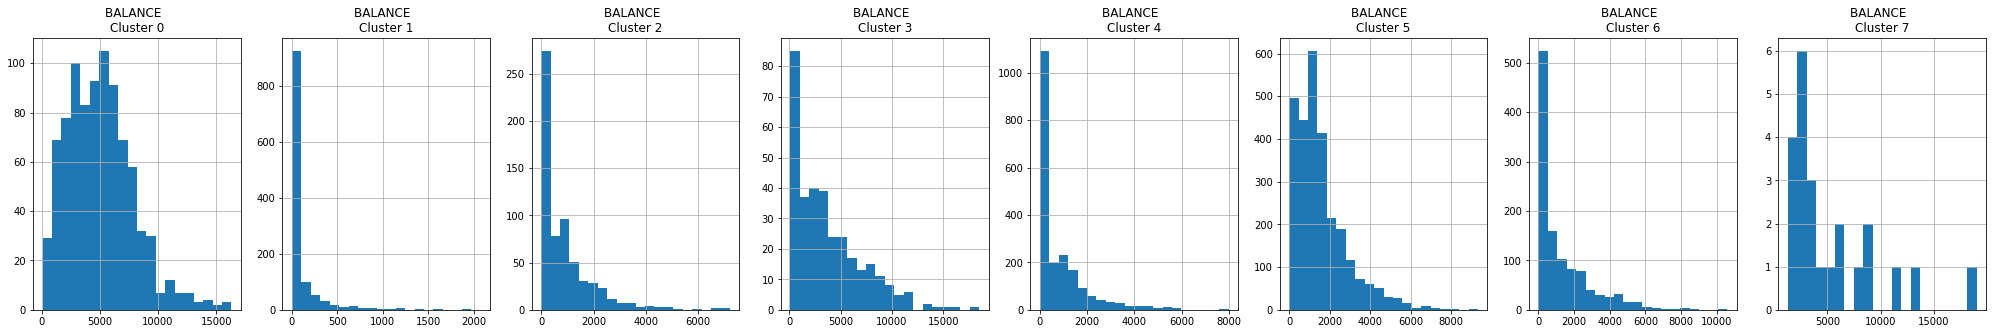

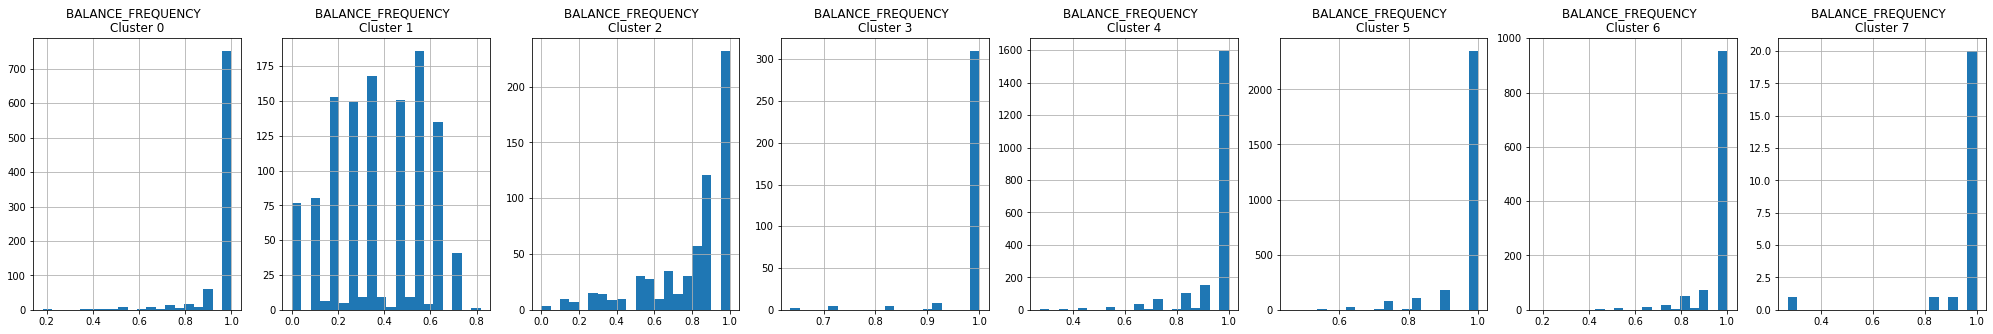

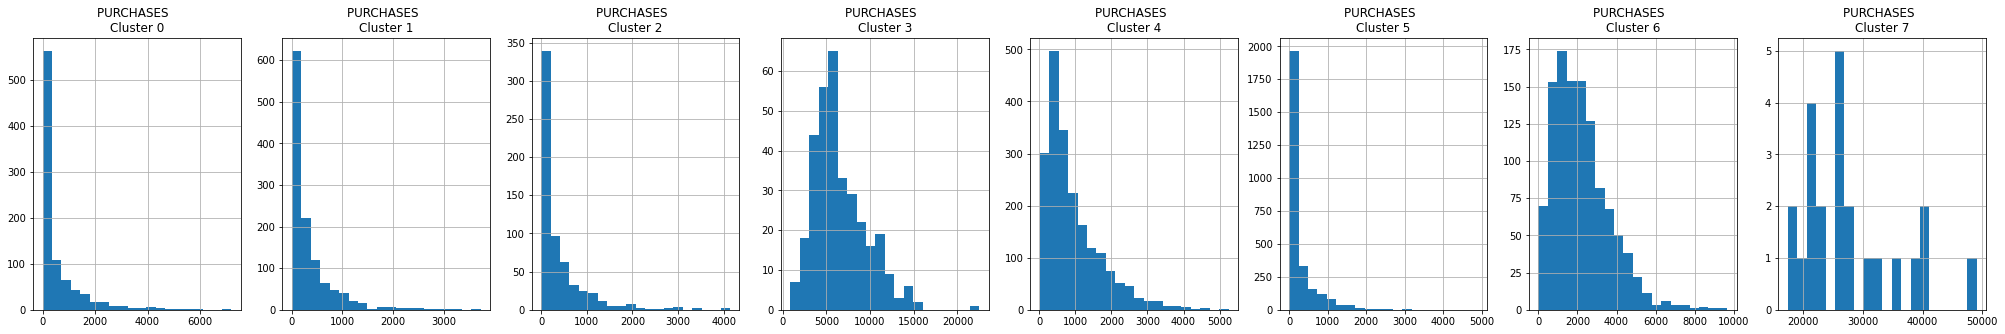

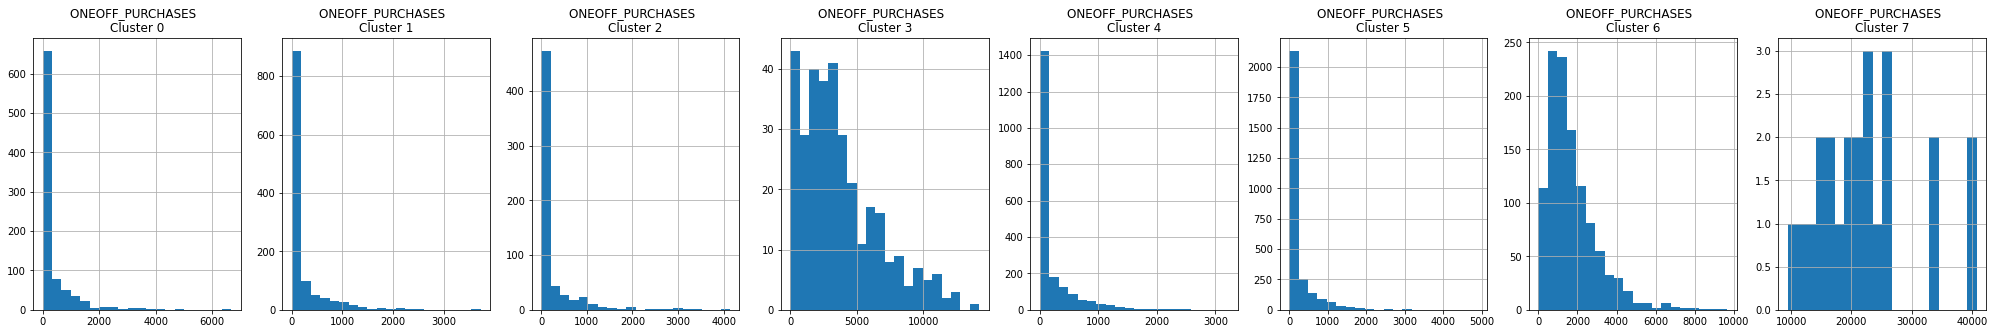

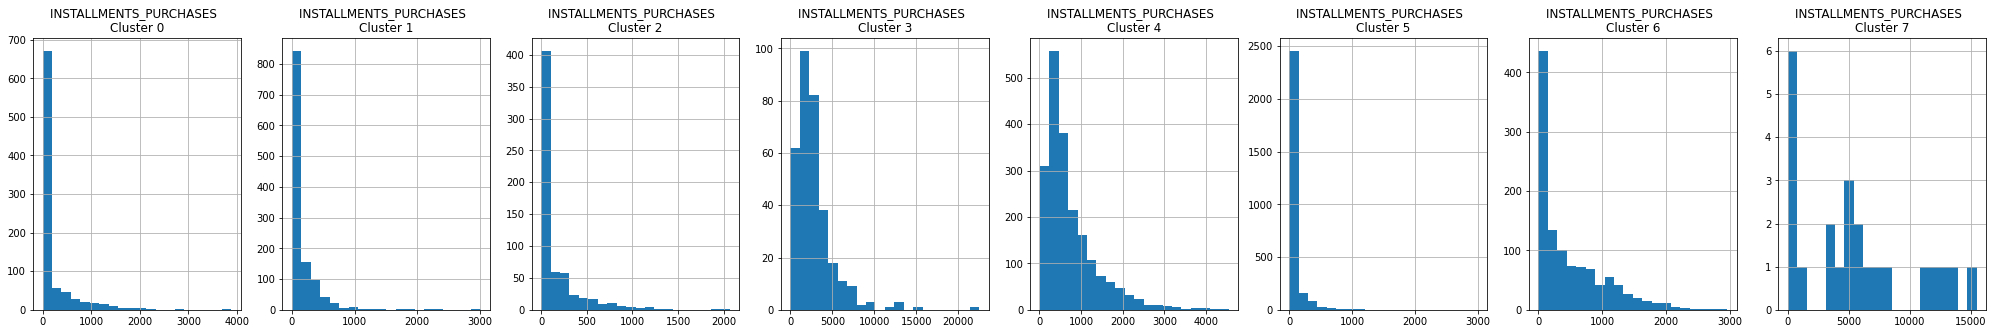

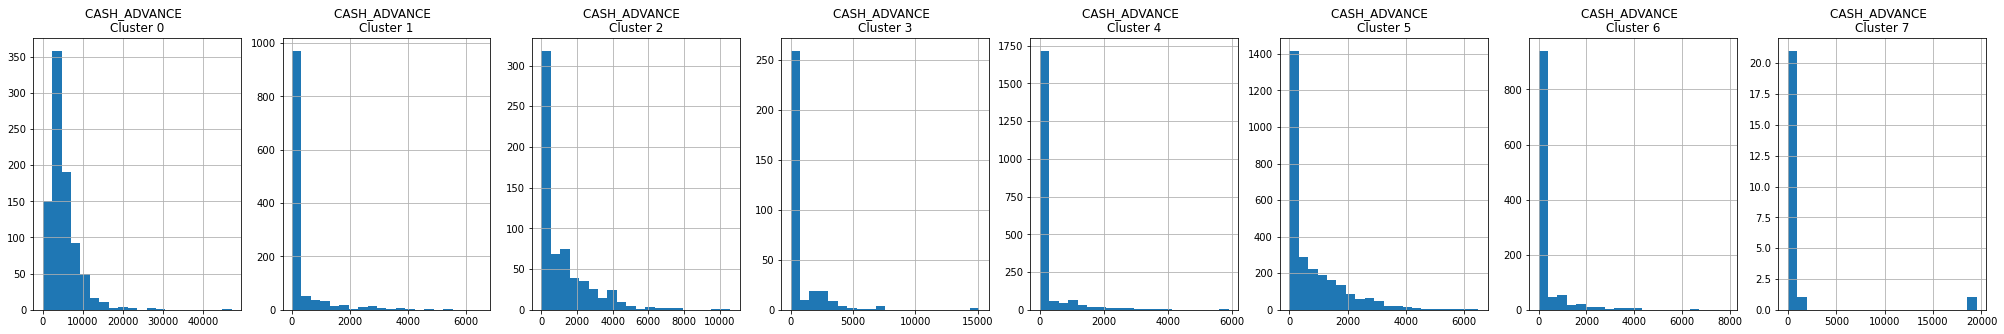

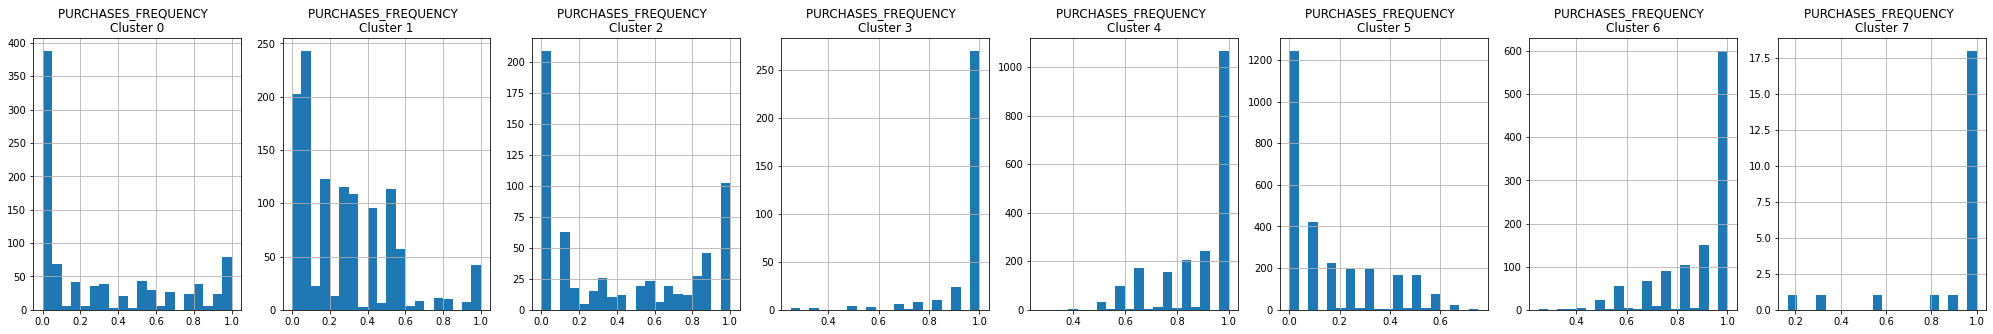

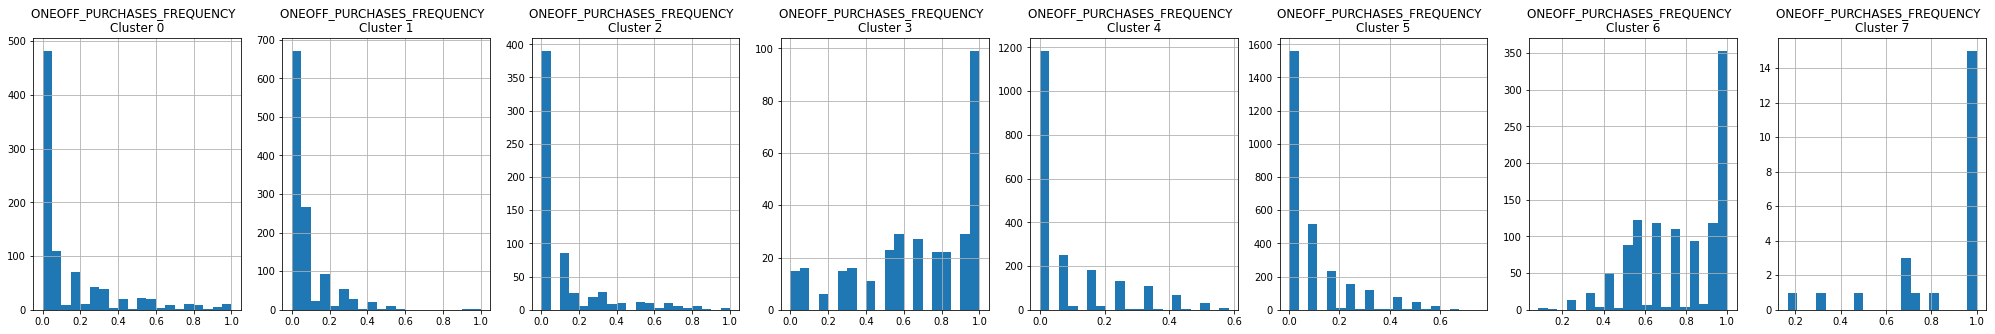

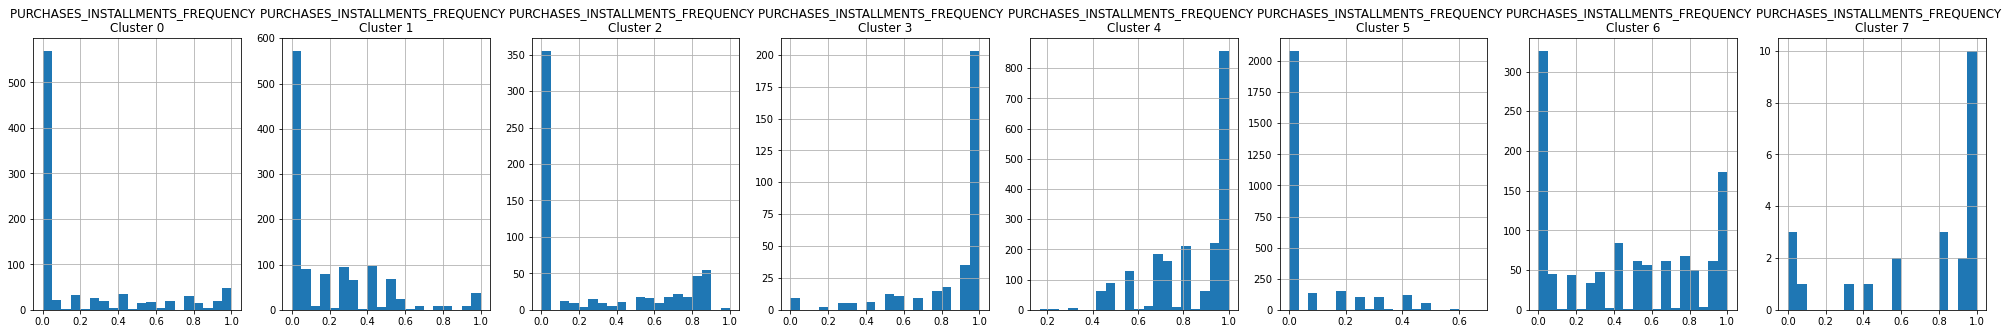

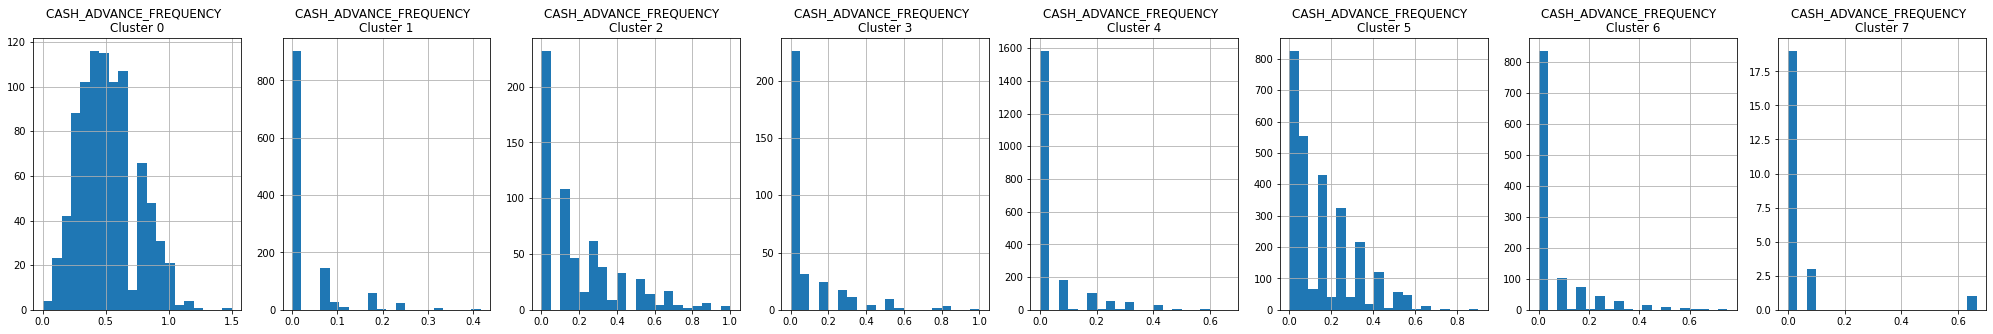

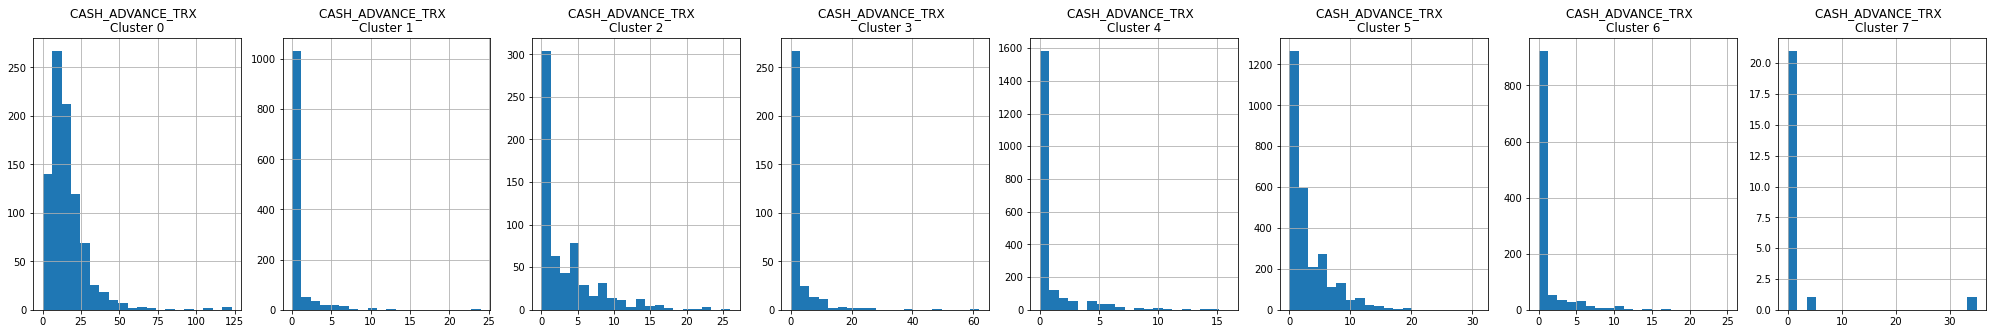

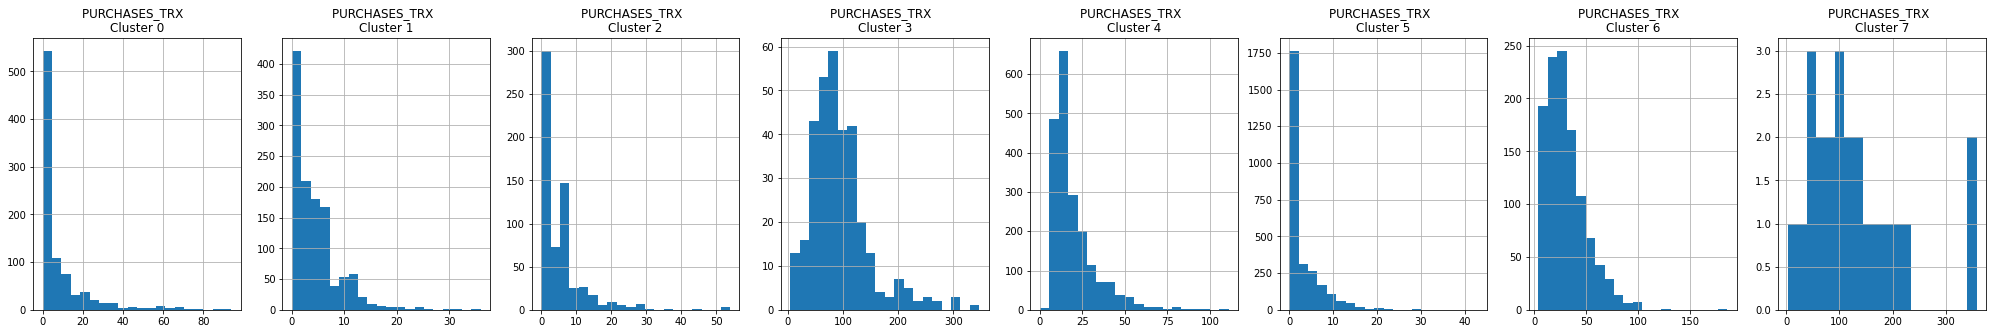

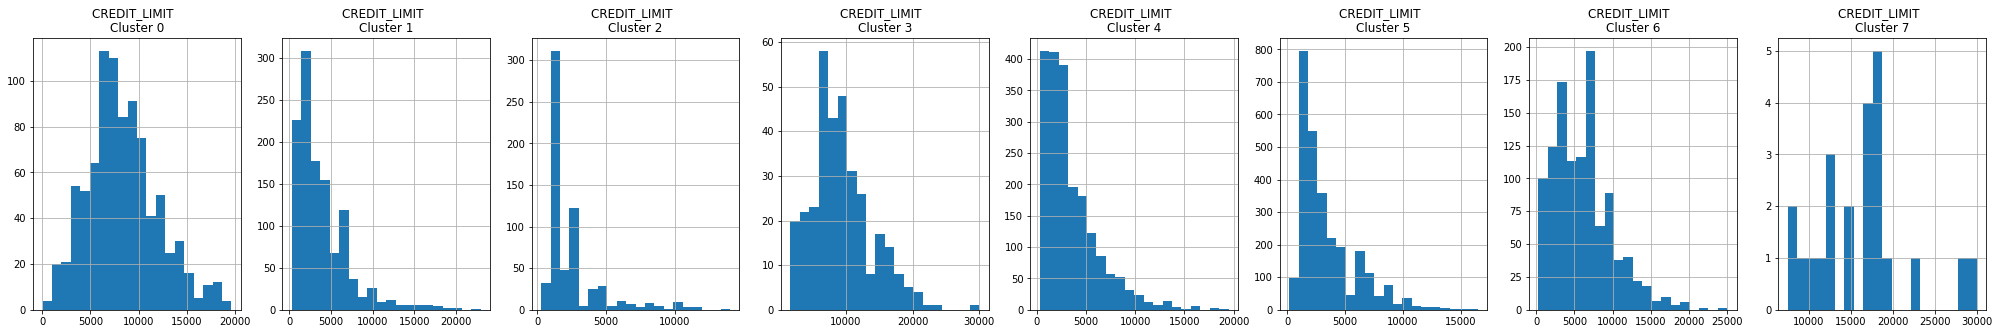

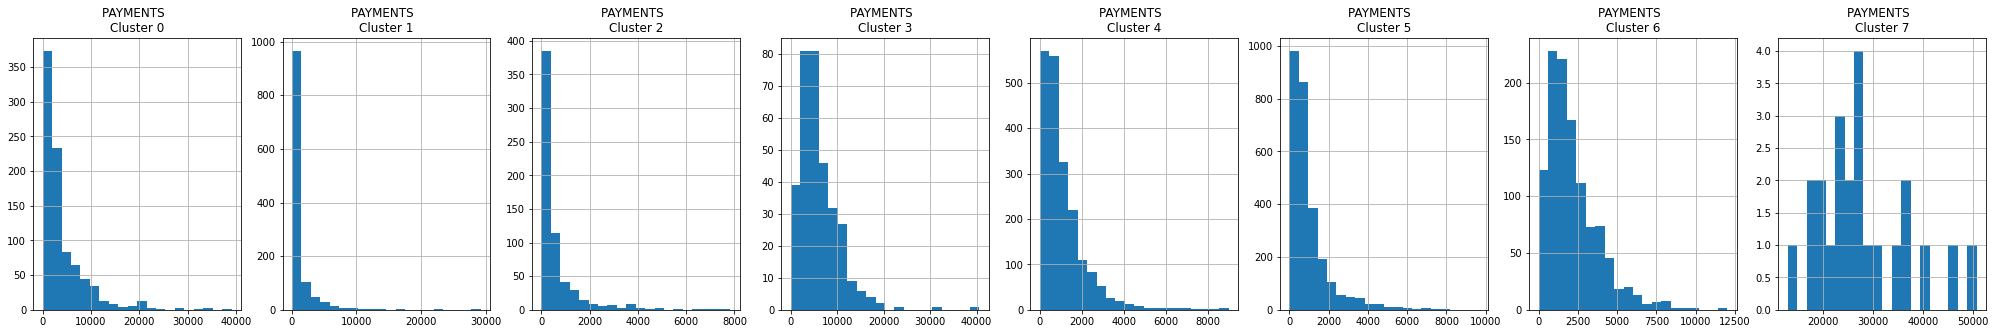

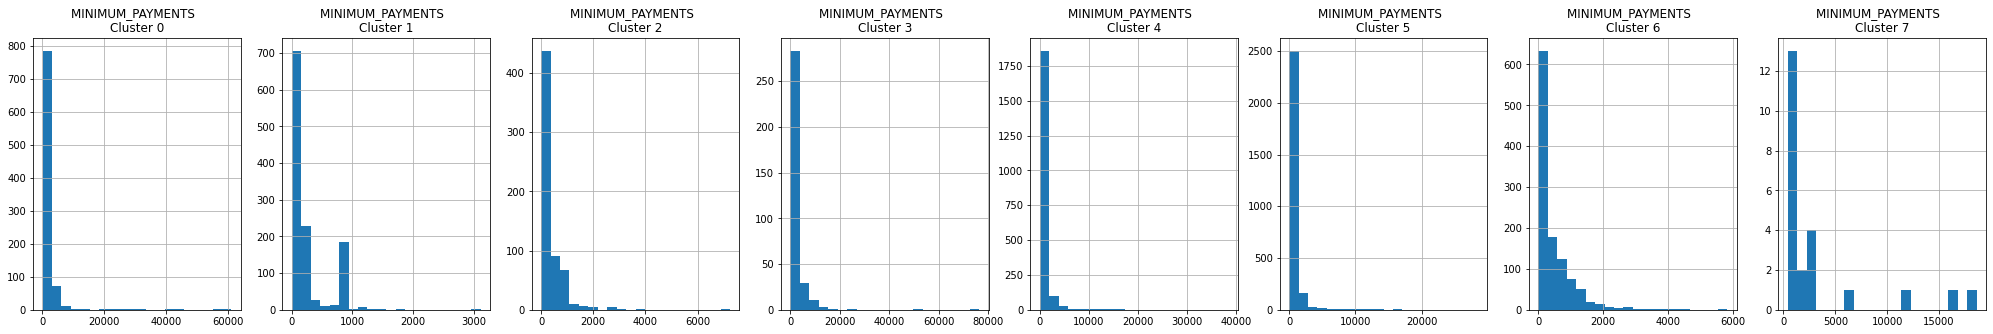

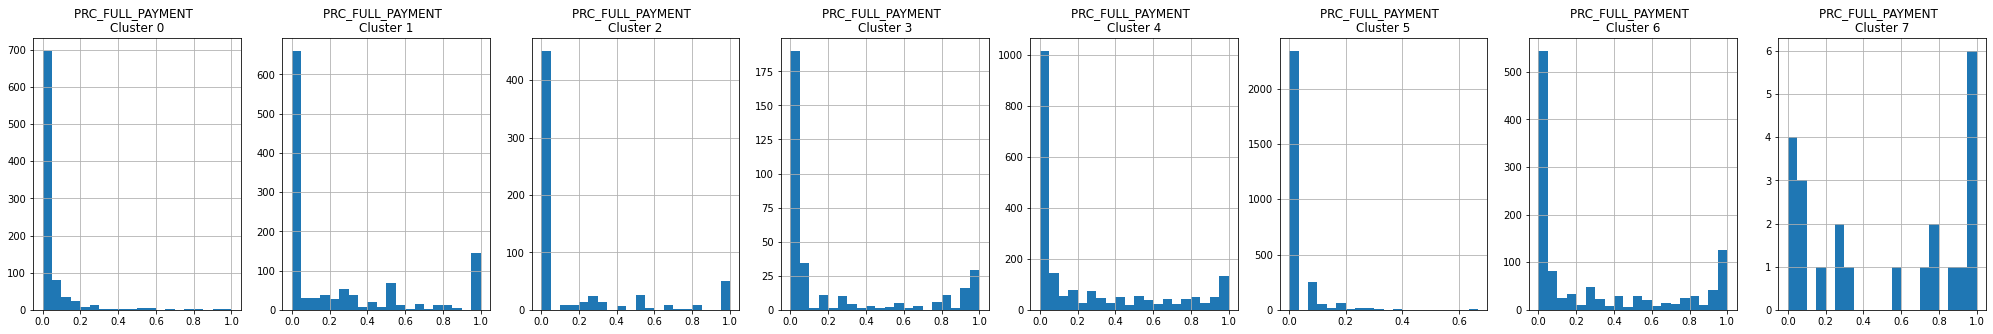

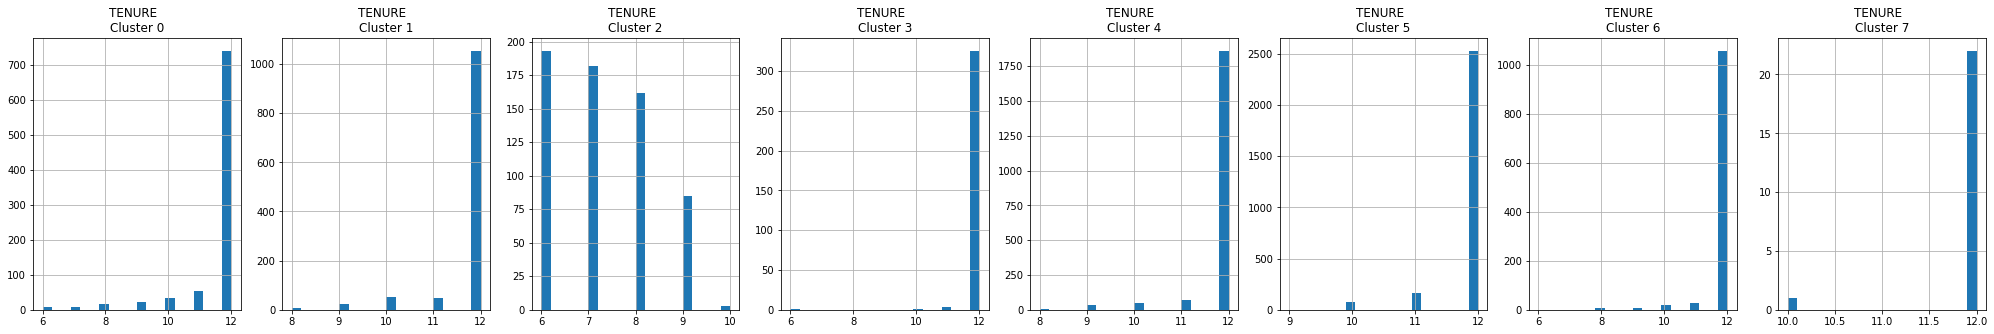

In [37]:
# Visualizamos histogramas para cada cluster 
for i in creditcard_df.columns:
    plt.figure(figsize=(35, 5))
    for j in range(8):
        plt.subplot(1, 8, j+1)
        cluster = creditcard_df_cluster[creditcard_df_cluster["cluster"]==j]
        cluster[i].hist(bins=20)
        plt.title("{}  \nCluster {}".format(i, j))
    plt.show()

# TAREA 7: APLICAR ANÁLISIS DE LAS COMPONENTES PRINCIPALES Y VISUALIZAR LOS RESULTADOS 

![alt text](https://drive.google.com/uc?id=1NVp_GyDswfd9w977aUv0UbyqyWYmY3WM)

In [38]:
# Obtenemos las componentes principales
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68222034, -1.07645165],
       [-1.13829609,  2.50647999],
       [ 0.96968869, -0.38350838],
       ...,
       [-0.92620289, -1.81078802],
       [-2.33655177, -0.65796997],
       [-0.55642094, -0.40046152]])

In [39]:
# Creamos un dataframe con las dos componentes 
pca_df = pd.DataFrame(data=principal_comp, columns=["pca1", "pca2"])
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076452
1,-1.138296,2.506480
2,0.969689,-0.383508
3,-0.873632,0.043157
4,-1.599432,-0.688579


In [40]:
# Concatenamos las etiquetas de los clusters con el dataframe de las componentes principales
pca_df = pd.concat([pca_df, pd.DataFrame({"cluster": labels})], axis=1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076452,5
1,-1.138296,2.506480,0
2,0.969689,-0.383508,6
3,-0.873632,0.043157,5
4,-1.599432,-0.688579,5


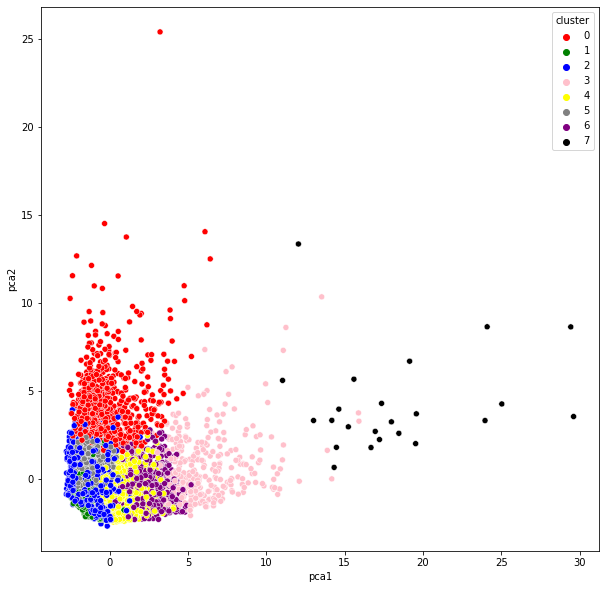

In [41]:
plt.figure(figsize=(10, 10))
ax = sns.scatterplot(x="pca1", y="pca2", hue="cluster", data=pca_df,
                     palette=["red", "green", "blue", "pink", "yellow", "gray", "purple", "black"])
plt.show()

# TAREA #8: ENTENDER LA TEORÍA Y LA INTUICIÓN DETRÁS DE LOS AUTOENCODERS

![alt text](https://drive.google.com/uc?id=1NdCuYAK59um_VnY79hINUJ7v0mnhGnrO)

![alt text](https://drive.google.com/uc?id=1Na2EEcSHUiihUsUL6969z-VIPaLB5G-z)

![alt text](https://drive.google.com/uc?id=1NXSf4svLiQYJnZQllDhgbiCjVY2ZH9vp)

# TAREA #9: APLICAR LOS AUTOENCODERS (REDUCIR LA DIMENSIÓN DE LOS DATOS CON LOS AUTOENCODERS)

In [42]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import SGD

encoding_dim = 7
input_df = Input(shape=(17, ))

# Glorot normal inicializador (Xavier normal initializer) toma muestras aleatorias de una distribución normal truncada

x = Dense(encoding_dim, activation="relu")(input_df)
x = Dense(500, activation="relu", kernel_initializer="glorot_uniform")(x)
x = Dense(500, activation="relu", kernel_initializer="glorot_uniform")(x)
x = Dense(2000, activation="relu", kernel_initializer="glorot_uniform")(x)

encoded = Dense(10, activation="relu", kernel_initializer="glorot_uniform")(x)

x = Dense(2000, activation="relu", kernel_initializer="glorot_uniform")(encoded)
x = Dense(500, activation="relu", kernel_initializer="glorot_uniform")(x)

decoded = Dense(17, kernel_initializer="glorot_uniform")(x)

autoencoder = Model(input_df, decoded)
encoder = Model(input_df, encoded) # versión comprimida de la entrada

autoencoder.compile(optimizer="adam", loss="mean_squared_error")

In [43]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 17)]              0         
                                                                 
 dense (Dense)               (None, 7)                 126       
                                                                 
 dense_1 (Dense)             (None, 500)               4000      
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 2000)              1002000   
                                                                 
 dense_4 (Dense)             (None, 10)                20010     
                                                                 
 dense_5 (Dense)             (None, 2000)              22000 

In [44]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, batch_size=128, epochs=25, verbose=1)

Epoch 1/25
70/70 [==============================] - 5s 54ms/step - loss: 0.5759
Epoch 2/25
70/70 [==============================] - 5s 75ms/step - loss: 0.2928
Epoch 3/25
70/70 [==============================] - 4s 64ms/step - loss: 0.2141
Epoch 4/25
70/70 [==============================] - 4s 53ms/step - loss: 0.1890
Epoch 5/25
70/70 [==============================] - 4s 54ms/step - loss: 0.1629
Epoch 6/25
70/70 [==============================] - 4s 54ms/step - loss: 0.1569
Epoch 7/25
70/70 [==============================] - 4s 54ms/step - loss: 0.1351
Epoch 8/25
70/70 [==============================] - 4s 54ms/step - loss: 0.1203
Epoch 9/25
70/70 [==============================] - 4s 54ms/step - loss: 0.1117
Epoch 10/25
70/70 [==============================] - 4s 54ms/step - loss: 0.1024
Epoch 11/25
70/70 [==============================] - 4s 54ms/step - loss: 0.1022
Epoch 12/25
70/70 [==============================] - 4s 54ms/step - loss: 0.0967
Epoch 13/25
70/70 [==================

In [45]:
autoencoder.save_weights("/content/drive/MyDrive/ds4b/2. Marketing Department/autoencoder.h5")

In [46]:
pred = encoder.predict(creditcard_df_scaled)

In [47]:
pred.shape

(8950, 10)

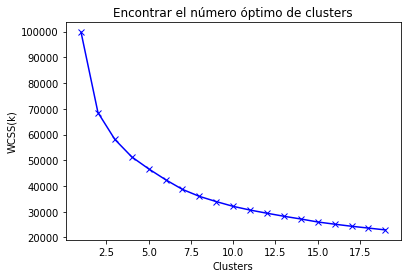

In [48]:
scores_2 = []
range_values = range(1, 20)

for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(pred)
    scores_2.append(kmeans.inertia_)  # WCSS

plt.plot(range_values, scores_2, "bx-")
plt.title("Encontrar el número óptimo de clusters")
plt.xlabel("Clusters")
plt.ylabel("WCSS(k)")
plt.show()

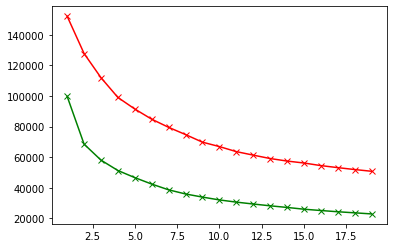

In [49]:
plt.plot(range_values, scores_1, 'bx-', color = "r")
plt.plot(range_values, scores_2, 'bx-', color = "g")

In [50]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(pred)

In [51]:
df_cluster_dr = pd.concat([creditcard_df, pd.DataFrame({"cluster": labels})], axis=1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


In [52]:
pca = PCA(n_components=2)
princ_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data=princ_comp, columns=["pca1", "pca2"])
pca_df.head()

,pca1,pca2
0,-1.961102,-0.008073
1,0.109557,-1.611675
2,-1.577224,0.783426
3,-1.797391,-0.350933
4,-1.549607,-0.236931


In [53]:
pca_df = pd.concat([pca_df, pd.DataFrame({"cluster": labels})], axis=1)

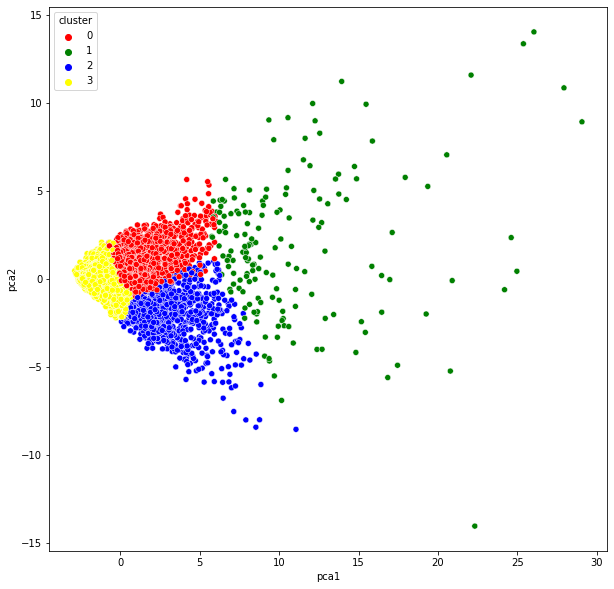

In [54]:
plt.figure(figsize=(10, 10))
ax = sns.scatterplot(x="pca1", y="pca2", hue="cluster", data=pca_df, palette=["red", "green", "blue", "yellow"])
plt.show()

# ¡EXCELENTE TRABAJO! PUEDES ESTAR ORGULLOSO DE TUS HABILIDADES RECIEN ADQUIRIDAS